# Importing Necessary Libraries


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# we have 10000 rows and 14 columns
df.shape

(10000, 14)

In [5]:
# checkig the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# creating a copy of the original dataset
df1 = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing


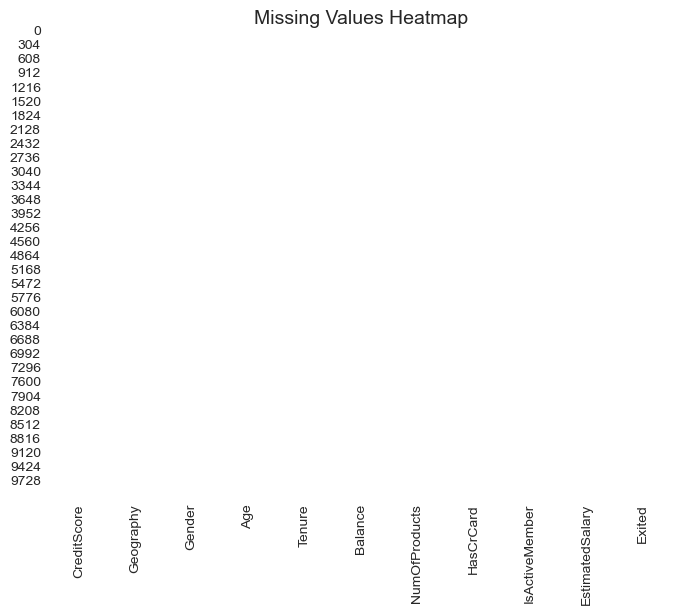

In [7]:
# checking for missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df1.isna(), cbar=False, cmap='coolwarm', linewidths=0.5)
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()

The above heatmap shows that there are no missing values in the dataset


In [8]:
# Checking for duplicate values
df1[df1.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


There are no duplicates in the dataset


# EDA(Exploratory Data Analysis)


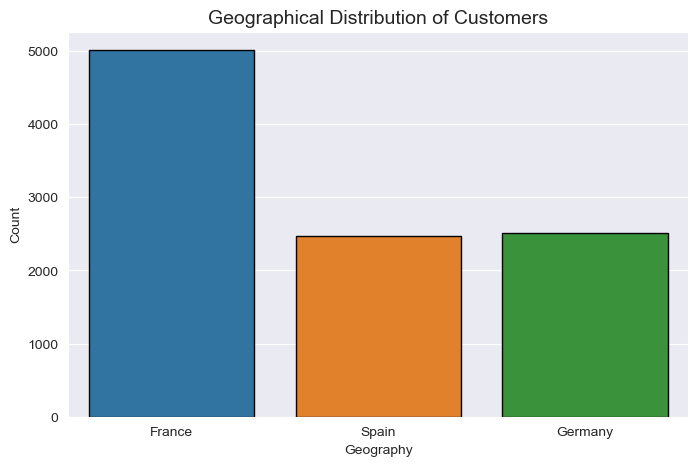

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Geography'], edgecolor='black')
plt.title("Geographical Distribution of Customers", fontsize=14)
plt.xlabel("Geography")
plt.ylabel("Count")
plt.show()

We can see that majority of the customers are from France


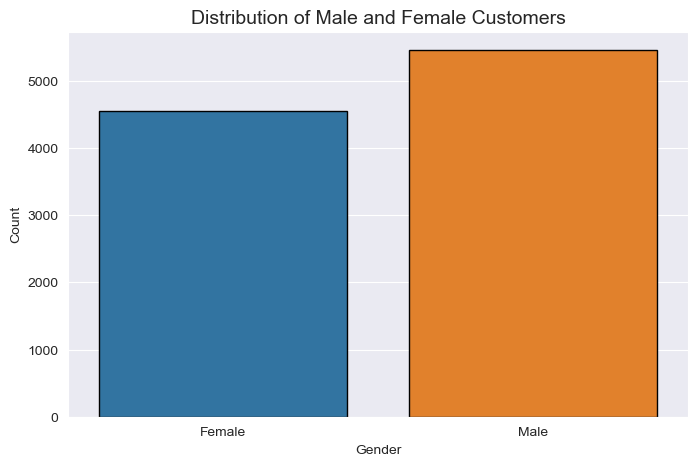

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df1['Gender'], edgecolor='black')
plt.title("Distribution of Male and Female Customers", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Maximum are Male customers


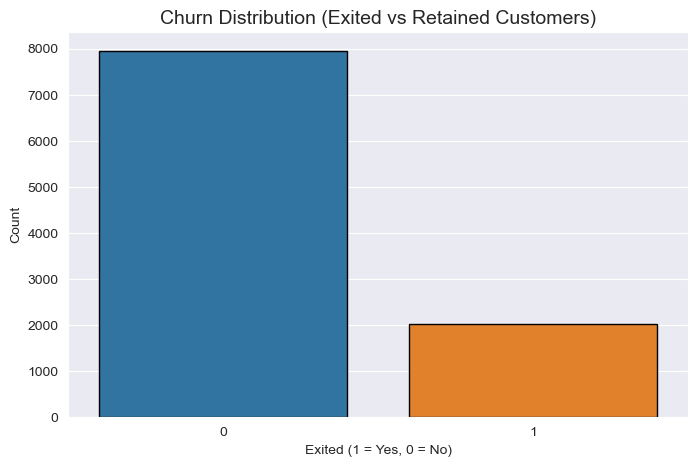

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df1['Exited'], edgecolor='black')
plt.title("Churn Distribution (Exited vs Retained Customers)", fontsize=14)
plt.xlabel("Exited (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

We can see that data is highly imbalanced. Almost 80% of our data is from class 0 (not exited) and 20% data is from class 1 (exited).


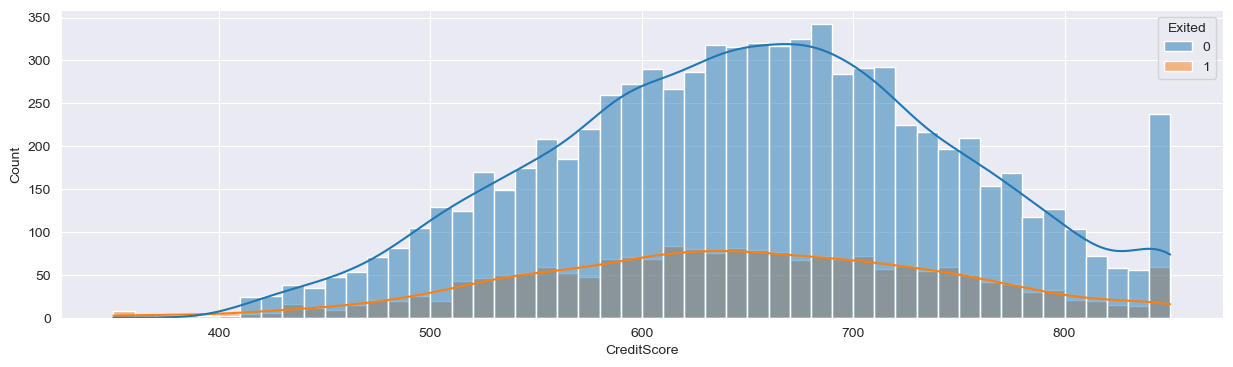

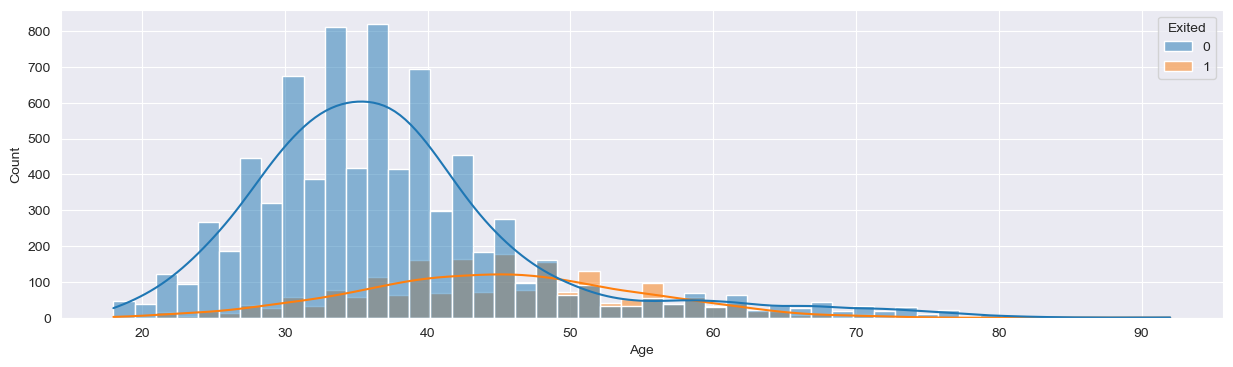

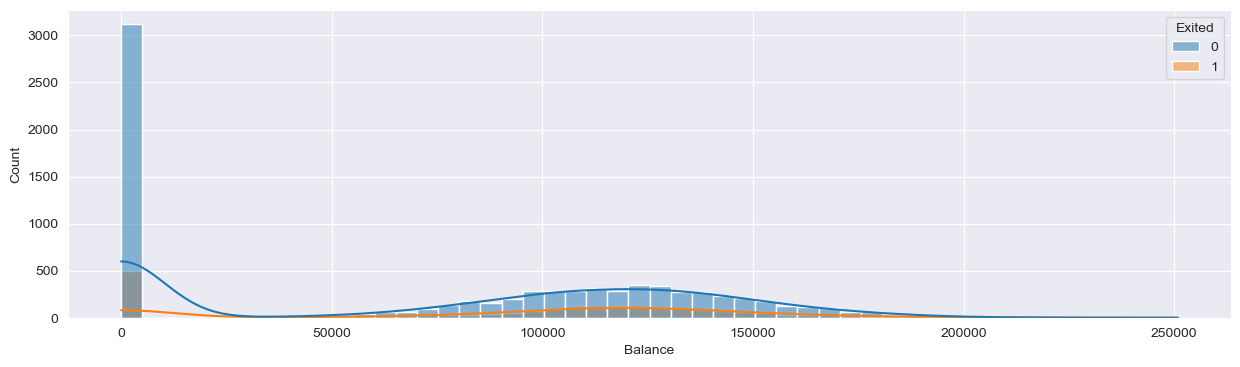

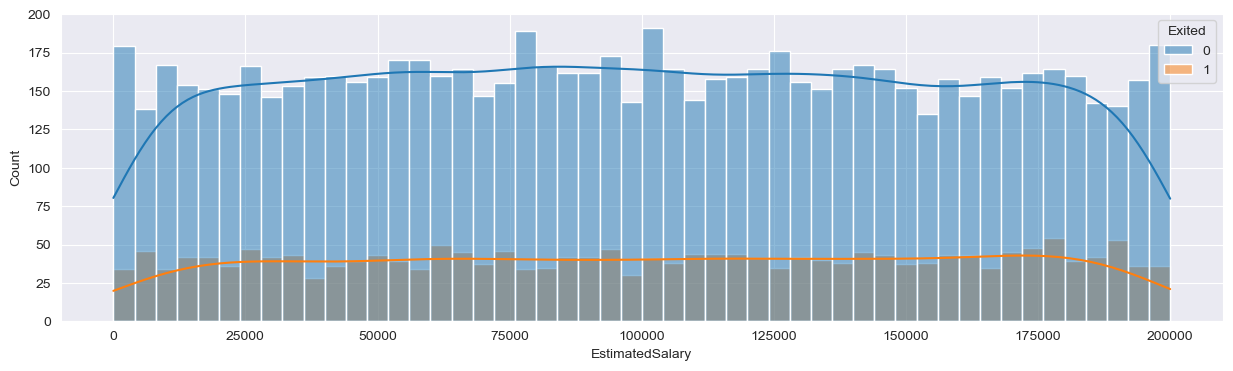

In [12]:
continuous_vars = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for column in continuous_vars:
    fig, ax = plt.subplots(figsize=(15, 4))
    fig = sns.histplot(data=df1, x=column, hue="Exited",  bins=50, kde=True)
    plt.show()

**Some observations:**

1. For 'CreditScore' column:

   - Customers with higher credit scores (above 700) are more likely to stay.
   - Lower credit score customers (below 600) have a higher chance of churning.

2. For 'Age' column:

   - The majority of customers are younger customers (20-40 years), with a peak around 35 years.They have a lower churn rate.
   - Middle Aged Customers (40-60 years) have a higher churn rate

3. For 'Balance' column:

   - Customers with a 0 balance are less likely to churn.
   - Customers with mid-range balances (50,000 - 150,000) are at a higher risk of churn.

4. For 'EstimatedSalary' column:
   - Salary does not appear to be a strong predictor of churn.
   - Customers churn at almost equal rates regardless of their salary.

This might indicate that CreditScore, Age and Balance are significant factors contributing to customer churn.


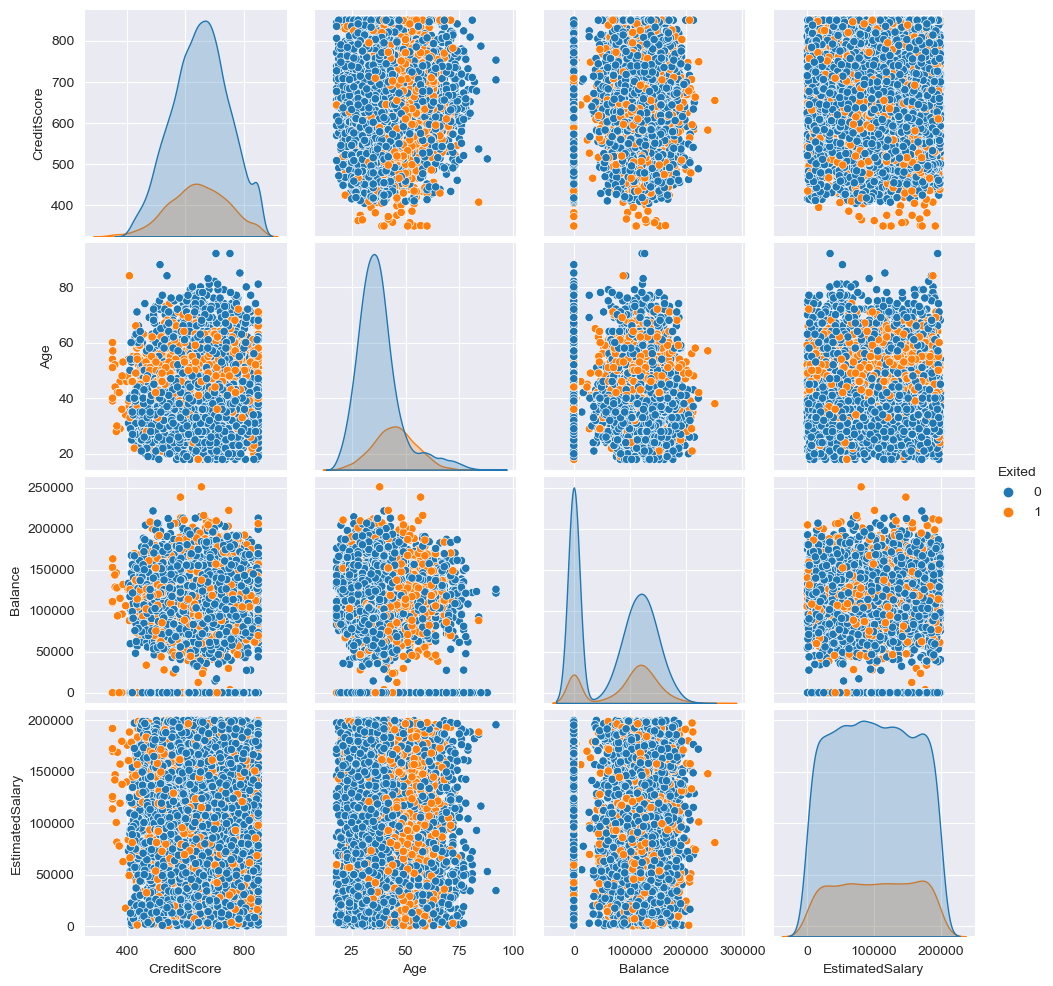

In [13]:
sns.pairplot(df1[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited', data=df1);

In [14]:
le =LabelEncoder()

In [18]:
df1['Gender'] = le.fit_transform(df1['Gender'])
df1['Geography'] = le.fit_transform(df1['Geography'])

In [19]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# Correlation Analysis


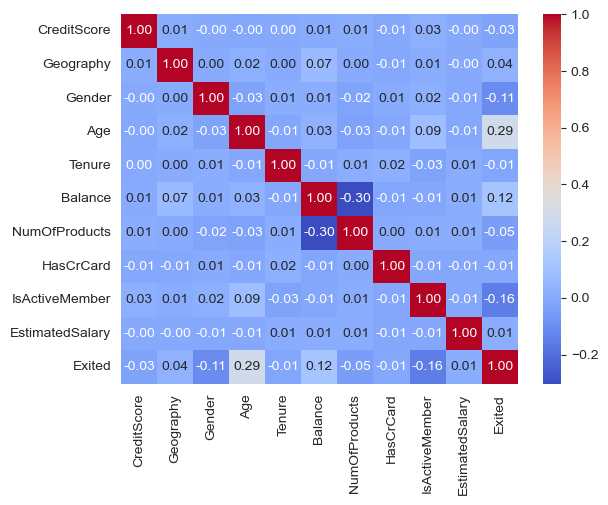

In [20]:
sns.heatmap(df1.corr(), annot=True,cmap='coolwarm' ,fmt='0.2f');

In [21]:
df1.corr()['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
Geography          0.035943
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Gender            -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64

As we can see that 'Age', 'Balance' and 'Gender' are higly correlated with our target column 'Exited', hence they are more likely to influnece customer churn rate.


In [22]:
X = df1.drop('Exited', axis=1)
y = df1['Exited']

# Handling Imbalance in Dataset

As we saw in our EDA that 80% of our data is from class 0 and 20% is from class 1. We would be handling this by using technique called Oversampling.

**Oversampling:** is a technique used to balance an imbalanced dataset by increasing the number of samples in the minority class. This ensures that machine learning models do not favor the majority class and can learn meaningful patterns from both classes.

To perform oversampling we would be using SMOTE(Synthetic Minority Over-sampling Technique).

How SMOTE works?

- Generates new synthetic samples for the minority class using interpolation.

- Selects two similar minority class samples and creates a new data point along the line connecting them.

- Reduces overfitting and improves generalization.


In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

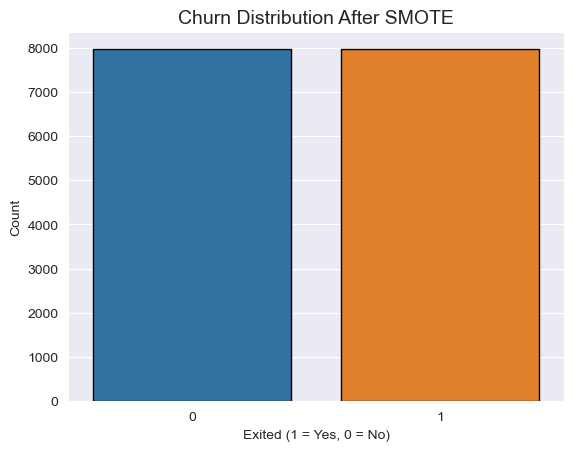

In [28]:
sns.countplot(y_resampled,edgecolor='black')
plt.title("Churn Distribution After SMOTE", fontsize=14)
plt.xlabel("Exited (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Splitting Data into Training and Testing


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression


In [32]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_pred = log_model.predict(X_test_scaled)

In [33]:
log_acc = accuracy_score(y_test, log_pred)
print(f"Accuracy Score of Logistic Regression: {log_acc}")

Accuracy Score of Logistic Regression: 0.763653483992467


In [34]:
log_clf = classification_report(y_test, log_pred)
print(log_clf)

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1633
           1       0.75      0.77      0.76      1553

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186



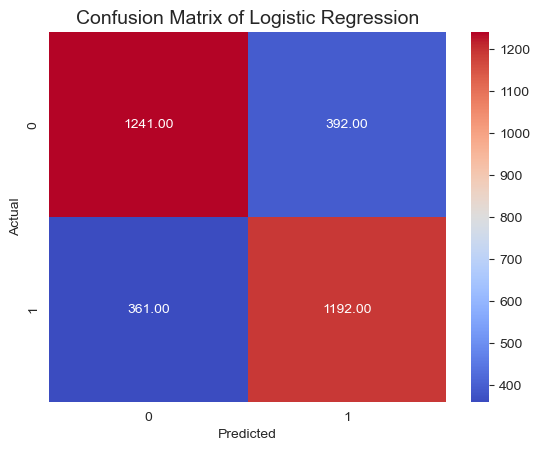

In [35]:
log_cm = confusion_matrix(y_test, log_pred)
sns.heatmap(log_cm, annot=True, cmap='coolwarm', fmt='0.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Logistic Regression", fontsize=14)
plt.show()

# Decision Tree


In [36]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)

In [37]:
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Accuracy Score of Decision Tree: {dt_acc}")

Accuracy Score of Decision Tree: 0.8044569993722536


In [38]:
dt_clf = classification_report(y_test, dt_pred)
print(dt_clf)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1633
           1       0.79      0.82      0.80      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.81      0.80      0.80      3186



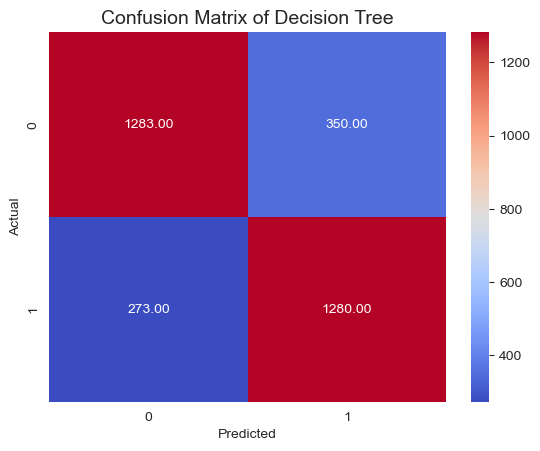

In [39]:
dt_cm = confusion_matrix(y_test, dt_pred)   
sns.heatmap(dt_cm, annot=True, cmap='coolwarm', fmt='0.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Decision Tree", fontsize=14)
plt.show()

# Random Forest


In [40]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

In [41]:
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Accuracy Score of Random Forest: {rf_acc}")

Accuracy Score of Random Forest: 0.8600125549278091


In [42]:
rf_clf = classification_report(y_test, rf_pred)
print(rf_clf)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1633
           1       0.85      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



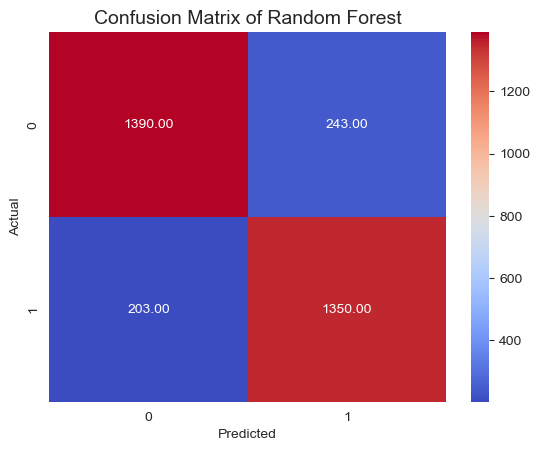

In [43]:
rf_cm = confusion_matrix(y_test, rf_pred)   
sns.heatmap(rf_cm, annot=True, cmap='coolwarm', fmt='0.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest", fontsize=14);

# SVM


In [44]:
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
svc_pred = svc_model.predict(X_test_scaled)

In [45]:
svc_acc = accuracy_score(y_test, svc_pred)
print(f"Accuracy Score of Support Vector Machine: {svc_acc}")

Accuracy Score of Support Vector Machine: 0.8443188951663528


In [46]:
svc_clf = classification_report(y_test, svc_pred)
print(svc_clf)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1633
           1       0.84      0.84      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



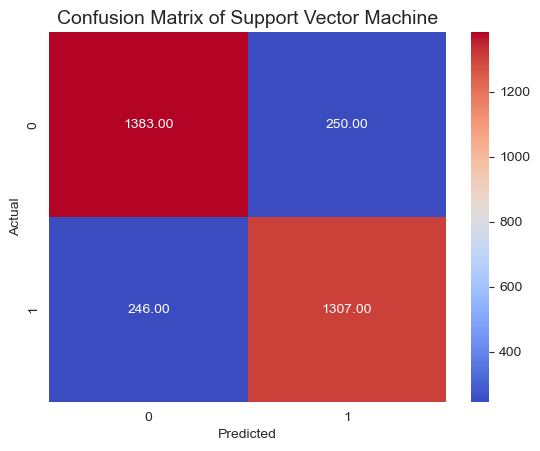

In [47]:
svc_cm = confusion_matrix(y_test, svc_pred)
sns.heatmap(svc_cm, annot=True, cmap='coolwarm', fmt='0.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Support Vector Machine", fontsize=14);

# KNN


In [48]:
k_values = [1, 3, 5, 10]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    knn_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, knn_pred)
    accuracies.append(accuracy)
    print(f'Accuracy (k={k}): {accuracy}')
    
knn_acc = max(accuracies)
print(f"\nMaximum Accuracy Score of K-Nearest Neighbors: {knn_acc}")

Accuracy (k=1): 0.8286252354048964
Accuracy (k=3): 0.835216572504708
Accuracy (k=5): 0.8314500941619586
Accuracy (k=10): 0.8242310106716887

Maximum Accuracy Score of K-Nearest Neighbors: 0.835216572504708


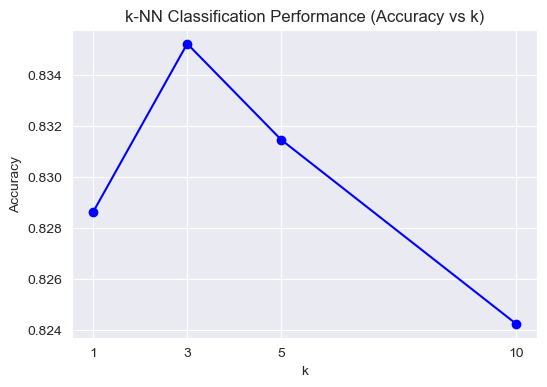

In [49]:
plt.figure(figsize=(6, 4))
plt.plot(k_values, accuracies, marker='o', color='b')
plt.title('k-NN Classification Performance (Accuracy vs k)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [50]:
knn_clf = classification_report(y_test, knn_pred)
print(knn_clf)

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1633
           1       0.82      0.81      0.82      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



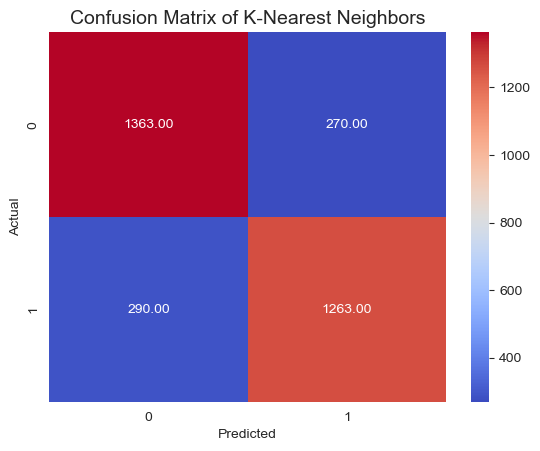

In [51]:
knn_cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(knn_cm, annot=True, cmap='coolwarm', fmt='0.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of K-Nearest Neighbors", fontsize=14)
plt.show()

# XGBoost


In [52]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

In [53]:
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"Accuracy Score of XGBoost: {xgb_acc}")

Accuracy Score of XGBoost: 0.8618957940991839


In [54]:
xgb_clf = classification_report(y_test, xgb_pred)
print(xgb_clf)

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1633
           1       0.85      0.88      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



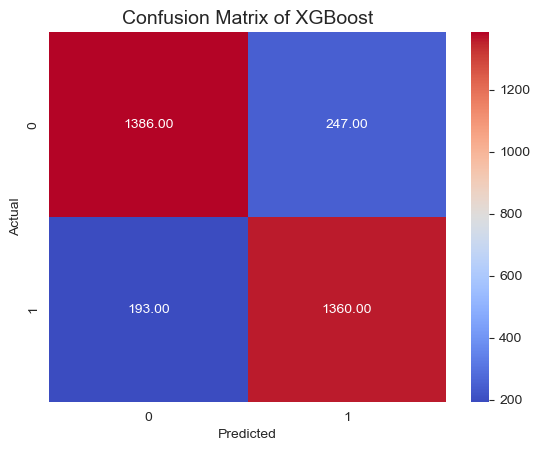

In [55]:
xgb_cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(xgb_cm, annot=True, cmap='coolwarm', fmt='0.2f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of XGBoost", fontsize=14)
plt.show()

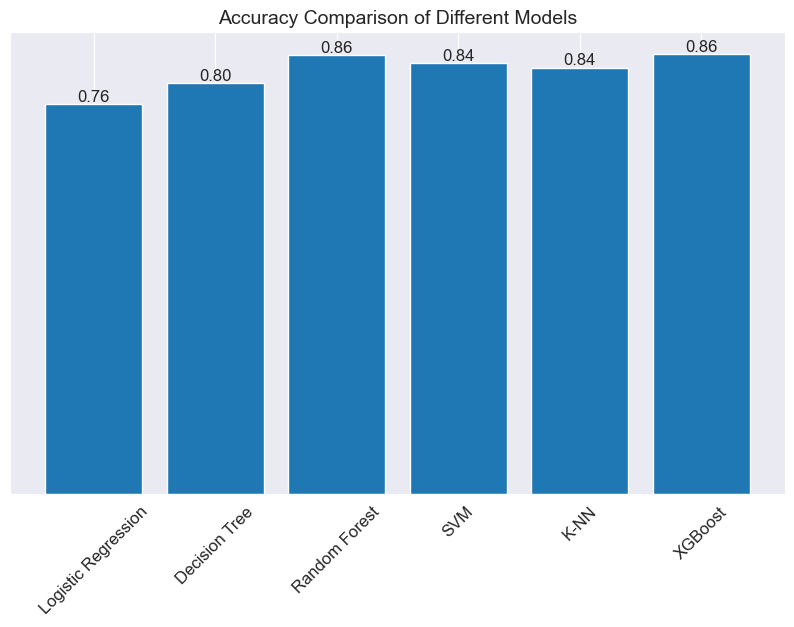

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'K-NN', 'XGBoost'], [log_acc, dt_acc, rf_acc, svc_acc, knn_acc, xgb_acc])
plt.title('Accuracy Comparison of Different Models', fontsize=14)
for i, v in enumerate([log_acc, dt_acc, rf_acc, svc_acc, knn_acc, xgb_acc]):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.yticks([])
plt.show()

From the above plot we can see that Random Forest and XGBoost have higher accuracy
